# 第二章 数据预处理

在机器学习中，有一句常被提起的话：`garbage in, garbage out`，意思是如果数据清理的不干净，数据质量低下，那么再好的算法，输出的模型也是无用的，甚至比随机预测还要糟糕。因此，数据预处理在整个机器学习过程中，起了巨大的作用，对数据没有一个好的预处理过程，往往会产出无用的模型。数据预处理又是一个非常大的领域，针对不同的数据类型，例如表格数据、文字、图像、音频等，会有各种预处理的方法，在本章节，我们将讨论一些常用的对于表格数据预处理方法。  
本章节我们将会基于一个预测员工离职的数据展开数据预处理讨论。我们对原始数据进行了一定的删减，原始数据可以在[这里](https://www.pkbigdata.com/common/cmpt/%E5%91%98%E5%B7%A5%E7%A6%BB%E8%81%8C%E9%A2%84%E6%B5%8B%E8%AE%AD%E7%BB%83%E8%B5%9B_%E8%B5%9B%E4%BD%93%E4%B8%8E%E6%95%B0%E6%8D%AE.html)找到

## 理解业务背景

机器学习任务往往是为了业务需要而服务的，大多数需求都是由业务部门所提出的。因此当我们接手一个机器学习的任务时，第一步并不是急着获取数据，处理数据和建立机器学习模型，相反的，我们应当抽出一定的时间去和业务部门去讨论需求，明白整个业务流程和所接手的机器学习任务在整个业务中的位置和作用。  
与业务部门讨论相关背景在实践中往往是很重要的一环，而盲目的对着手数据进行处理，大部分情况下会适得其反。例如你很可能得出一个业务上“众所周知”的结论。当你兴奋地告诉业务负责人：我发现每月底你的XX产品销量都会上升，需要多备货，业务负责人可能会不削地告诉你，这个是产品特点，大家都会在月底买我们的产品。因此，当与业务部门讨论业务时，尽可能获取多的业务领域的知识，我们应当站在业务领域的肩膀上来展开我们的工作，这样能做出更多具有创造性的工作。  
业务讨论中，除了一些领域中的知识，还有一个比较重要的就是讨论你能获取的数据。当有需求时，一般业务部门会提供一些数据，这时，你需要明白各个字段的含义，以及他们通常数据值所在的范围，这有助于我们在观察数据时，及时识别一些异常数据点，进行处理，往往一些遗漏处理的异常值会导致模型性能大幅下降。同时，你可以询问业务关于一些数值的切分，例如年龄字段，我们可以按照业务提供经验，划分成几个年龄段，这样可能更好处理一些。  
毕竟机器学习研发人员往往对具体的业务是不熟悉，经常展开业务方面的讨论，能够更好的帮助我们理解业务，懂得业务，从而极大地帮助我们展开机器学习的工作，因此切记不能盲目的闭门造车，而忽略了我们的实际场景，这往往容易使我们偏离业务部门的需求，甚至南辕北辙。  
总之，在着手开始手工作前，确保对于业务的理解是充分的，并且最关键的是与业务部门的理解是一致的。

## 预览数据

假设HR部门收集了员工的一些资料，想判断一下这些员工是否会离职，因此他们给了我们一个Excel文件，我们和他们讨论这些数据，数据字段的说明如下：

- EmployeeNumber：员工号码
- Age：年龄
- BusinessTravel：商务差旅频率，Non-Travel表示不出差；Travel_Rarely表示不经常出差；Travel_Frequently表示经常出差
- Department：员工所在部门，Sales表示销售部；Research & Development表示研发部；Human Resources表示人力资源部
- DistanceFromHome：公司跟家庭住址的距离，从1到29，1表示最近，29表示最远
- Education：员工的教育程度，从1到5，5表示教育程度最高
- EducationField：员工所学习的专业领域，Life Sciences表示生命科学；Medical表示医疗；Marketing表示市场营销；Technical Degree表示技术学位；Human Resources表示人力资源；Other表示其他
- Gender：员工性别，Male表示男性；Female表示女性
- JobSatisfaction：工作满意度，从1到4，1代表满意程度最低，4代表满意程度最高
- MonthlyIncome：员工月收入，范围在1009到19999之间
- NumCompaniesWorked：员工曾经工作过的公司数
- Over18：年龄是否超过18岁
- OverTime：是否加班，Yes表示加班；No表示不加班
- StandardHours：标准工时
- TotalWorkingYears：总工龄
- YearsAtCompany：在目前公司工作年数
- Attrition：我们的预测目标，员工是否已经离职，0表示未离职；1表示已经离职

通常拿到数据后，我先会预览一下这些数据，了解一下数据的大致情况。  
首先，我们确定一下这些数据的类型，一般分为数值类型（如长度、薪资等）、时间类型（如日期、时间戳等）、类别类型（如颜色、国家等）等。  
一般来说，文字型的字段一般都是类别类型，例如`BusinessTravel`、`Department`等；数字型的字段一般为数值类型，例如`Age`、`MonthlyIncome`等。这里需要注意的是`Education`、`JobSatisfaction`这两个字段虽然是数字，但是类似这些“等级”类型的数据，我们当作类别类型处理更为妥当。  
有时，类别类型和数值类型并不是绝对的，例如年龄数据，有时候也可以看做是一个类别类型，例如18岁，18既是表示岁数的数值，同时也是代表18岁这个年龄的“一类人”。因此这些需要视具体情况而定，灵活使用。  
在确定类型后，我们先看下整体数据是否有缺失，缺失数据的分布情况；其次我们可以分开来观察不同类型的数据，数值类型的数据我们可以看下他们的均值、标准差等；类别类型的数据我们可以看下他们的各个类别的数量分布情况等；最后，我们先初步观察下这些数据是否有一些特别明显的异常数据，例如一些与尝试相违背的数据，如年龄填的是999，很可能是某种特别标记，也可能是输入错误。  
接下来我们来实际操作一下。

### 读入数据

读入数据这部分我们已经在数据来源这块中已经详细阐述了，我们这里使用`pandas`库中的`read_excel`读入这些数据。

In [1]:
# 读入数据

import pandas as pd

data = pd.read_excel('data/pfm_data.xlsx')
# 使用head方法观察前5行数据和数据的列
data.head()

,EmployeeNumber,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,StandardHours,TotalWorkingYears,YearsAtCompany,Attrition
0,77,37,Travel_Rarely,Research & Development,1,4,Life Sciences,Male,3,5993,1,Y,No,80,7,7,0
1,1245,54,Travel_Frequently,Research & Development,1,4,Life Sciences,Female,3,10502,7,Y,No,80,33,5,0
2,147,34,Travel_Frequently,Research & Development,7,3,Life Sciences,Male,3,6074,1,Y,Yes,80,9,9,1
3,1026,39,Travel_Rarely,Research & Development,1,1,Life Sciences,Female,4,12742,1,Y,No,80,21,21,0
4,1111,28,Travel_Frequently,Research & Development,1,3,Medical,Male,2,2596,1,Y,No,80,1,1,1


通过`shape`我们可以看到数据的行数与列数

In [2]:
# 查看数据行数和列数

data.shape

(1100, 17)

这数据集一共有1100条数据，共有16列。

### 删除ID列

一般情况下，样本`ID`在预测中基本上不起什么作用，因为他只是标示不同的样本，如本例中标示的是员工，大部分情况下我们会选择删除这列数据。但有时候也会蕴藏一些信息，例如`ID`号比较小的可能是老员工，比较大的是新员工，但是一般在其他信息中，例如在公司工作的时长，会隐含这些信息，因此我们在这里选择删除这一列。  
这里我们使用`drop`方法。`drop`方法可以按照`axis`参数表示按行还是列进行数据丢弃，其中`0`表示行，`1`表示列。在较老版本的`pandas`中，去掉某一列需要`axis`设置为`1`，比较麻烦，在较新的版本中，我们可以直接使用`columns`参数来指定需要去掉的列即可。  
还有个参数也会经常用到，就是`inplace`，当`inplace`被设置为`True`时，表示这个改动在原有的`DataFrame`上进行，而不是返回一个`DataFrame`。`DataFrame`中其他的一些需要做变换的操作中，例如`fillna`、`rename`，都有这个函数。  

In [3]:
# 删除EmployeeNumber列

data.drop(columns='EmployeeNumber', inplace=True)
data.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,StandardHours,TotalWorkingYears,YearsAtCompany,Attrition
0,37,Travel_Rarely,Research & Development,1,4,Life Sciences,Male,3,5993,1,Y,No,80,7,7,0
1,54,Travel_Frequently,Research & Development,1,4,Life Sciences,Female,3,10502,7,Y,No,80,33,5,0
2,34,Travel_Frequently,Research & Development,7,3,Life Sciences,Male,3,6074,1,Y,Yes,80,9,9,1
3,39,Travel_Rarely,Research & Development,1,1,Life Sciences,Female,4,12742,1,Y,No,80,21,21,0
4,28,Travel_Frequently,Research & Development,1,3,Medical,Male,2,2596,1,Y,No,80,1,1,1


### 观察数据缺失情况

我们可以使用`info`方法来查看当前数据集中是否有缺失值。

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 16 columns):
Age                   1100 non-null int64
BusinessTravel        1100 non-null object
Department            1100 non-null object
DistanceFromHome      1100 non-null int64
Education             1100 non-null int64
EducationField        1100 non-null object
Gender                1100 non-null object
JobSatisfaction       1100 non-null int64
MonthlyIncome         1100 non-null int64
NumCompaniesWorked    1100 non-null int64
Over18                1100 non-null object
OverTime              1100 non-null object
StandardHours         1100 non-null int64
TotalWorkingYears     1100 non-null int64
YearsAtCompany        1100 non-null int64
Attrition             1100 non-null int64
dtypes: int64(10), object(6)
memory usage: 137.6+ KB


从上面的结果中可以看到每列数据的非缺失值的数量，即`non-null`，每列都有1100条`non-null`数据，说明我们的数据集中不存在缺失值的情况。如果出现了缺失值，那么我们改如何处理呢？这个我们将在后面的小节中，讨论处理缺失值的方式。

### 观察给类型下的数据概况

按照前面所述，我们先将`Education`、`JobSatisfaction`这两列转为`str`类型，将其作为类别类型数据。  
我们可以使用`astype`方法进行数据类型转换。

In [5]:
# 将Education、JobSatisfaction转为str类型

data['Education'] = data['Education'].astype(str)
data['JobSatisfaction'] = data['JobSatisfaction'].astype(str)

我们可以使用`dtypes`来查看数据类型是否与我们之前讨论的一致。

In [6]:
data.dtypes

Age                    int64
BusinessTravel        object
Department            object
DistanceFromHome       int64
Education             object
EducationField        object
Gender                object
JobSatisfaction       object
MonthlyIncome          int64
NumCompaniesWorked     int64
Over18                object
OverTime              object
StandardHours          int64
TotalWorkingYears      int64
YearsAtCompany         int64
Attrition              int64
dtype: object

接下来我们将各类型的列名分开，放入两个`list`中

In [7]:
# 选择数值类型列
num_cols = data.select_dtypes(include='number').columns.tolist()
# 选择类别类型列
cls_cols = data.select_dtypes(include='object').columns.tolist()

num_cols, cls_cols

(['Age',
  'DistanceFromHome',
  'MonthlyIncome',
  'NumCompaniesWorked',
  'StandardHours',
  'TotalWorkingYears',
  'YearsAtCompany',
  'Attrition'],
 ['BusinessTravel',
  'Department',
  'Education',
  'EducationField',
  'Gender',
  'JobSatisfaction',
  'Over18',
  'OverTime'])

#### 观察数值类型数据

我们先来观察一下数值类型的数据情况。我们可以直接使用`describe`（`describe`方法默认是查看数值类型数据的）方法进行查看。`describe`方法会展示样本数量、均值、标准差、最小值、第一四分位数、中位数、第三四分位数以及最大值的情况。

In [8]:
data.describe()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,StandardHours,TotalWorkingYears,YearsAtCompany,Attrition
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.0,1100.000000,1100.000000,1100.000000
mean,36.999091,9.427273,6483.620909,2.683636,80.0,11.221818,7.011818,0.161818
std,9.037230,8.196694,4715.293419,2.510017,0.0,7.825548,6.223093,0.368451
min,18.000000,1.000000,1009.000000,0.000000,80.0,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2924.500000,1.000000,80.0,6.000000,3.000000,0.000000
50%,36.000000,7.000000,4857.000000,2.000000,80.0,10.000000,5.000000,0.000000
75%,43.000000,15.000000,8354.500000,4.000000,80.0,15.000000,9.000000,0.000000
max,60.000000,29.000000,19999.000000,9.000000,80.0,40.000000,37.000000,1.000000


我们可以从上面的结果中看到，`StandardHours`的标准差为0，也就意味着这一列全部都是80，这个对于我们预测是没有任何帮助的，因此我们可以将其删除。同时，我们可以看到`Attrition`的均值是0.161818，那意味着数据集中有16.18%的样本是离职的，可以看出这个数据集可能是`不平衡数据集`，即0和1的个数并不是接近于1:1的，这在随后的处理中，例如平衡样本个数、选择评估标准等，是需要注意的。

我们也可以通过可视化的方法来观察这些数据，查看下是否有异常值等情况存在。  
`DataFrame`中有`plot`方法，在较旧的版本中，我们可以指定`kind`参数，如设置为`line`则画出折线图，设置为`bar`则画出条形图等。在较新版本中则可以在`plot`后直接调用相应图形的方法，如`plot.bar`等，具体的方法可以查看[`plot`方法的文档](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#plotting)

In [9]:
# 年龄数据分布

data['Age'].plot.hist(bins=20)

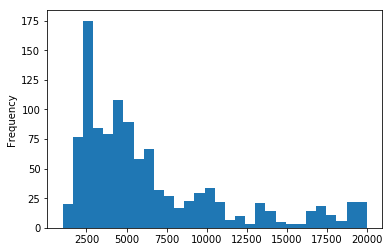

In [10]:
# 月收入数据分布

data['MonthlyIncome'].plot.hist(bins=30)

我们也可以通过`matplotlib`库来做相应的数据可视化操作，我们将在数据可视化章节中做具体的讨论。

#### 观察类别类型数据

同样，我们可以使用`describe`方法来观察类别类型数据的情况，我们需要将参数`include`设置为`object`，表示我们查看的是类别类型。这时`describe`方法会展示样本数量、唯一值的数量、出现次数最多的类别及其出现次数。

In [11]:
data.describe(include='object')

,BusinessTravel,Department,Education,EducationField,Gender,JobSatisfaction,Over18,OverTime
count,1100,1100,1100,1100,1100,1100,1100,1100
unique,3,3,5,6,2,4,1,2
top,Travel_Rarely,Research & Development,3,Life Sciences,Male,4,Y,No
freq,787,727,431,462,653,350,1100,794


我们可以从上面的结果中看到，`Over18`的唯一值数量只有1个（当然雇佣的员工应当大于18岁），即所有的值都为`Y`，因此这列也是可以进行删除的。  
同样，也可以通过`plot`方法来可视化数据。例如使用条形图来观察教育领域的分布，我们可以先使用value_counts函数进行各个类别的频次统计，然后调用plot.bar方法绘制条形图。  

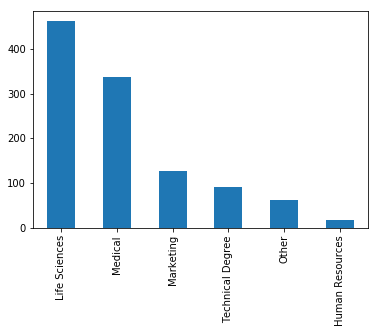

In [12]:
# 教育领域分布

data['EducationField'].value_counts().plot.bar()

通过初步的观察，我们可以将`StandardHours`和`Over18`这两列删除。

In [13]:
data.drop(columns=['StandardHours', 'Over18'], inplace=True)
data.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,TotalWorkingYears,YearsAtCompany,Attrition
0,37,Travel_Rarely,Research & Development,1,4,Life Sciences,Male,3,5993,1,No,7,7,0
1,54,Travel_Frequently,Research & Development,1,4,Life Sciences,Female,3,10502,7,No,33,5,0
2,34,Travel_Frequently,Research & Development,7,3,Life Sciences,Male,3,6074,1,Yes,9,9,1
3,39,Travel_Rarely,Research & Development,1,1,Life Sciences,Female,4,12742,1,No,21,21,0
4,28,Travel_Frequently,Research & Development,1,3,Medical,Male,2,2596,1,No,1,1,1


## 缺失值处理

缺失值在实际的工作中是非常常见的。例如一份调查问卷，很多调查对象不愿意透露自己的年龄、薪资等个人隐私；由于传感器故障导致部分时间的数据缺失等。这一小节我们将介绍3个处理缺失值的方式：删除、简单填充和基于模型。    
我们首先构造一个简单具有缺失值的数据集，用于之后的演示。

In [73]:
# 构造一个具有缺失值的数据集
import numpy as np

missing_data = pd.DataFrame({
    'name': ['Marry', 'Peter', 'Jhon', 'Steven', 'James', 'Emma', 'David'], 
    'score': [9.2, 8.3, 6.4, np.nan, 7.3, np.nan, 8.2], 
    'level1': ['A', 'B', np.nan, 'B', 'C', 'C', 'B'],
    'level2': ['C', 'A', 'F', 'D', 'A', 'B', 'D'],
    'level3': ['F', 'D', 'D', 'F', 'F', np.nan, np.nan]
})
missing_data

,name,score,level1,level2,level3
0,Marry,9.2,A,C,F
1,Peter,8.3,B,A,D
2,Jhon,6.4,NaN,F,D
3,Steven,NaN,B,D,F
4,James,7.3,C,A,F
5,Emma,NaN,C,B,NaN
6,David,8.2,B,D,NaN


### 定位缺失值

要处理缺失值，首先我们需要先观察一下这些缺失值，因此第一步我们要讨论定位到缺失值。`DataFrame`中可以通过`isnull()`方法来定位与查看缺失值的情况。

In [56]:
# 查看score为缺失值的样本

missing_data[missing_data['score'].isnull()]

,name,score,level1,level2
3,Steven,NaN,B,D
5,Emma,NaN,NaN,B


### 删除缺失值

删除有缺失数据的样本或列往往是最简单的方式。如果我们的数据集样本量非常大，删除几条缺失的数据样本影响可能无乎其微，但这对于很多数据量较小的数据集是灾难性的。  
那如何界定是否可以直接删除是没有一个标准答案的。例如

- 如果某一列缺失数据占比达到了90%以上，这时你可以考虑将这一列进行删除，因为大部分都是缺失数据，这时对于我们的建模可能没有什么帮助。
- 如果某一列数据缺失了几条，而你的样本量又是很大，例如100万条样本，这时你可以选择删除含有缺失值的样本。
- 如果某一列缺失了20%的数据，但是你的样本量又很小，例如只有100来条数据，这时你选择删除可能会对之后的建模带来比较大的负面影响，可能不太适合使用删除的方式来处理。

总而言之，使用删除这个方式来处理缺失值，没有一个标准可循，需要是实际情况而定。  

`DataFrame`中提供了`dropna`方法可以方便删除与缺失值相关数据的方法。可以设置其参数来表示如何删除，常用的有3个参数

- `axis`：删除的行还是列，`0`表示删除行；`1`表示删除列，默认为`0`
- `how`：表示删除的条件，`any`表示只要有一个缺失就进行删除；`all`表示当所有的值都缺失时进行删除，默认为`any`
- `thresh`：表示保留非缺失数目达到改值的数据，例如`1`表示非确实数据达到1个的则不进行删除

In [31]:
# 删除含有缺失值的行

missing_data.dropna()

,name,score,level1,level2
0,Marry,9.2,A,C
1,Peter,8.3,B,A
4,James,7.3,C,A


In [32]:
# 删除含有缺失值的列

missing_data.dropna(axis=1)

,name,level2
0,Marry,C
1,Peter,A
2,Jhon,F
3,Steven,D
4,James,A
5,Emma,B
6,David,D


In [75]:
# 删除非缺失值小于4个的行

missing_data.dropna(thresh=4)

,name,score,level1,level2,level3
0,Marry,9.2,A,C,F
1,Peter,8.3,B,A,D
2,Jhon,6.4,NaN,F,D
3,Steven,NaN,B,D,F
4,James,7.3,C,A,F
6,David,8.2,B,D,NaN


### 简单填充缺失值

简单填充的方式是将缺失值填写为讲过简单计算或者从业务方获取的一个值，例如数值型的可以填入均值或者中位数；类别类型的可以填入频次最高的类别（众数）；填写一个标示，例如将类别的缺失值填充为`unknown`，作为一个新的类别；或者从业务方那边获取的比较可靠的值。这种方式的优点是计算简单，不会删除含有缺失数据的，可以保持数据量，但是缺点也非常明显，就是所填的数可能与真实情况相距甚远。  
啥情况下这种方式会比较好呢？同样这也是没有一个比较确切的标准。有时候我们可以根据业务实际来确定，例如有个偏男性向的应用，性别中90%以上的数据为男性，那么当性别缺失时，填入男性也是较为可靠的。  

`DataFrame`中提供了`fillna`的方法，这个方法可以方便帮助我们进行缺失值填充。

In [126]:
# 将用score的均值对score的缺失值进行填充

data_filled = missing_data.copy()
data_filled['score'].fillna(data_filled['score'].mean(), inplace=True)
data_filled

,name,score,level1,level2,level3
0,Marry,9.20,A,C,F
1,Peter,8.30,B,A,D
2,Jhon,6.40,NaN,F,D
3,Steven,7.88,B,D,F
4,James,7.30,C,A,F
5,Emma,7.88,C,B,NaN
6,David,8.20,B,D,NaN


In [127]:
# 将level1填充为出现频次最多的level1类别

data_filled['level1'].fillna(data_filled['level1'].value_counts().index[0], inplace=True)
data_filled

,name,score,level1,level2,level3
0,Marry,9.20,A,C,F
1,Peter,8.30,B,A,D
2,Jhon,6.40,B,F,D
3,Steven,7.88,B,D,F
4,James,7.30,C,A,F
5,Emma,7.88,C,B,NaN
6,David,8.20,B,D,NaN


In [128]:
# 将level3填充为unknown

data_filled['level3'].fillna('unknown', inplace=True)
data_filled

,name,score,level1,level2,level3
0,Marry,9.20,A,C,F
1,Peter,8.30,B,A,D
2,Jhon,6.40,B,F,D
3,Steven,7.88,B,D,F
4,James,7.30,C,A,F
5,Emma,7.88,C,B,unknown
6,David,8.20,B,D,unknown


除了按照全局的方式，另一种方式则是按照一定的分组进行填充，例如数据中`Steven`的`level1`为B，那么按`level1`进行分组，然后将B组的均值作为缺失值的填充。

In [85]:
# 按level1分组进行填充缺失值

# 按level1进行分组，计算score的各组均值
level_score = missing_data.groupby('level1').agg(avg_score = ('score', 'mean')).reset_index()
# 和missing_data做join操作
data_filled2 = pd.merge(missing_data, level_score, on='level1', how='left')
# 使用where方法将缺失值填充为平均分
data_filled2['score'].where(
    # 该条件表示的是如果这个score不是NA的，那么就保持原来值
    data_filled2['score'].notnull(), 
    # 如果是NA，则用这个avg_score值来填充
    data_filled2['avg_score'], 
    inplace=True)
# 删除临时的avg_score列
data_filled2.drop(columns='avg_score', inplace=True)
data_filled2

,name,score,level1,level2,level3
0,Marry,9.20,A,C,F
1,Peter,8.30,B,A,D
2,Jhon,6.40,NaN,F,D
3,Steven,8.25,B,D,F
4,James,7.30,C,A,F
5,Emma,7.30,C,B,NaN
6,David,8.20,B,D,NaN


除了使用`pandas`库，我们也可以使用`scikit-learn`库中的`SimpleImputer`类。  
在实践中，建模前的预处理过程中，这些操作通常都会使用`scikit-learn`库来进行，这是因为无论对测试样本还是新输入的待预测样本，这些样本在训练中是“看不到的”，例如在本例中，我们用均值`score`均值填充`score`缺失值时，用的是当前所有数据，但是在机器学习建模过程中，我们通常会将数据集分为训练集和测试集，这时我们填充的测试集的`score`缺失值应当用的是训练集的均值，而非测试集的`score`均值，因为测试集应当是不可见的（想象一下，我们的模型上线后，数据是一条一条进入系统的，这时，“测试集”只有一条，缺失的话，不存在均值这一说了。）

我们接来下实例化两个`SimpleImputer`对象，一个用于填充`score`，另一个用于填充`level1`、`level2`和`level3`。  
`sklearn`包中的类大部分有以下两个方法：

- `fit`：用于“拟合”数据。这里我们所说的拟合不但是我们通常所说的“拟合”，如拟合线性方程，在这里也指“拟合”数据的均值，“拟合”数据的中位数等，在`sklearn`中，一般`fit`用于训练你想使用这个类达到的变换效果，我们将在建模这一节中做更多的介绍。
- `transform`：用于转换数据。

有些用于数据变换的方法，例如数据标准化变换（`StandardScaler`）、多项式变化（`PolynomialFeatures`）等，会提供一个`fit_transform`方法，该方法不但可以完成对数据的拟合，同时也完成对数据的变换，使用起来比较方便。

In [101]:
# 使用SimpleImputer类对缺失值进行简单填充

from sklearn.impute import SimpleImputer

data_filled3 = missing_data.copy()
# 实例化一个填充中位数的对象
simple_imputer_num = SimpleImputer(strategy='median')
# 拟合score并且填充缺失值
score_filled = simple_imputer_num.fit_transform(missing_data[['score']])

# 实例化一个填充频次最高类别的对象
simple_imputer_cat = SimpleImputer(strategy='most_frequent')
# 拟合level1、level2和level3并且填充缺失值
level_filled = simple_imputer_cat.fit_transform(missing_data[['level1', 'level2', 'level3']])

data_filled3['score'] = score_filled
data_filled3[['level1', 'level2', 'level3']] = level_filled
data_filled3

,name,score,level1,level2,level3
0,Marry,9.2,A,C,F
1,Peter,8.3,B,A,D
2,Jhon,6.4,B,F,D
3,Steven,8.2,B,D,F
4,James,7.3,C,A,F
5,Emma,8.2,C,B,F
6,David,8.2,B,D,F


我们可以使用两个已经被拟合过的数据的`SimpleImputer`对象来填充一个新的含有缺失值的数据集

In [125]:
# 填充一个新的缺失值数据

missing_data2 = pd.DataFrame({
    'name': ['Richard', 'Bob'],
    'score': [np.nan, np.nan],
    'level1': [np.nan, 'A'],
    'level2': ['B', np.nan],
    'level3': [np.nan, 'C']
})

filled_score2 = simple_imputer_num.transform(missing_data2[['score']])
filled_level2 = simple_imputer_cat.transform(missing_data2[['level1', 'level2', 'level3']])

missing_data2['score'] = filled_score2
missing_data2[['level1', 'level2', 'level3']] = filled_level2

missing_data2

,name,score,level1,level2,level3
0,Richard,8.2,B,B,F
1,Bob,8.2,A,A,C


### 基于模型填充缺失值

基于模型的填充方法是根据其他数据特征建立一个模型来预估这些缺失值。`scikit-learn`中提供了两个基于模型的填充缺值失方法：`IterativeImputer`和`KNNImputer`。`IterativeImputer`是一种通过迭代，不断训练指定模型来填充缺失值的；`KNNImputer`则是通过最近邻算法来填充缺失值的， 如下列中，使用最近邻算法来填充缺失值。

In [138]:
# 使用最近邻算法填充缺失值

missing_data3 = pd.DataFrame({
    'id': [1, 2, 3],
    'x1': [1, 2, np.nan], 
    'x2': [3, 4, 3], 
    'x3': [np.nan, 6, 5], 
    'x4': [8, 8, 7]
})

from sklearn.impute import KNNImputer

# 实例化一个KNNImputer对象
knn_imputer = KNNImputer()
# 拟合KNNImputer对象，并且进行填充
missing_data3[['x1', 'x2', 'x3', 'x4']] = knn_imputer.fit_transform(missing_data3[['x1', 'x2', 'x3', 'x4']])
missing_data3

,id,x1,x2,x3,x4
0,1,1.0,3.0,5.5,8.0
1,2,2.0,4.0,6.0,8.0
2,3,1.5,3.0,5.0,7.0


### 在实践中处理缺失值

在实践过程中，一般我们先对缺失值的数量、分布等情况进行观察，如果数据量够大的情况，例如10万、100万的样本量，而含有缺失值的条数可能在100条、200条甚至500条以下，这时选择删除具有缺失值的样本可能不失为一种好的选择，因为填充缺失值是一个比较麻烦的过程，需要考虑的也会比较多，去掉很小一部分数据，可能对接下来的建模影响会比较小。有时，对一些类别数据，填充为`unknown`也是个不错的选择，可以将它们视为一种特殊的类别。还有重要的一点，就是对于一些缺失值，更多的可以去和业务方进行探讨，如果能从业务上定位出缺失的原因，那对我们处理这些缺失值也会有很大的帮助。  
如何处理这些缺失值没有标准的答案，我们可以对上文中的几种方式进行尝试，从最终的模型评估中找出一个能够达到我们预期效果的方式。